In [1]:
import os
def read_files(directory_path, filename):
    file_path = os.path.join(directory_path, filename)

    try:
        df = pd.read_csv(file_path)

        print(f"Successfully read the file: {file_path}")
        print(df.head())
        return df

    except FileNotFoundError:
        print(f"Error: File not found at the specified path: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")


In [2]:
# Fetching accelerometer data from participant 43
directory_path = r"W:\staff-bulk\ewi\insy\SPCDataSets\conflab-mm\v4\internal_data\annotations\Drinking\No_Audio"
filename = "vid3_seg2_ann1.csv"
df1 = read_files(directory_path, filename)
filename = "vid3_seg2_ann2.csv"
df2 = read_files(directory_path, filename)
filename = "vid3_seg2_ann3.csv"
df3 = read_files(directory_path, filename)

ground_truths = df1['43'] + df2['43'] + df3['43']
print(ground_truths)
print(ground_truths.index[ground_truths >= 1].tolist())

directory_path = r"W:\staff-bulk\ewi\insy\SPCDataSets\conflab-mm\v4\internal_data\annotations\Drinking\No_Audio"
filename = "vid3_seg3_ann1.csv"
df1 = read_files(directory_path, filename)
filename = "vid3_seg3_ann2.csv"
df2 = read_files(directory_path, filename)
filename = "vid3_seg3_ann3.csv"
df3 = read_files(directory_path, filename)

ground_truths = df1['43'] + df2['43'] + df3['43']
print(ground_truths)
print(ground_truths.index[ground_truths >= 1].tolist())
# Ranges: (790, 913), (2764, 2895), (3028, 3110), (4445, 4532), (6803, 6913), (6493, 6668), (6759, 6892), (7172, 7199) 
# Offset vid 3 seg 2: 20284
# Offset vid 3 seg 3: 27484
# offsetted ranges positive samples: (21074, 21197), (23048, 23179), (23312, 23394), (24729, 24816), (27087, 27197), (33977, 34152), (34243, 34376), (34656, 34683)
# offsetted ranges negative samples: (21394, 21509), (22895, 23010), (23873, 23995), (25003, 25128), (25661, 25743), (26082, 26174), (27846, 27970), (28803, 28930), (29396, 29562), (29803, 29949), (30825, 30911), (31251, 31329), (32316, 32387), (32843, 32906), (33342, 33450), (33858, 33974)

Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg2_ann1.csv
   1  2  3  4  5  6  7  8  9  10  ...  33  34  35  36  37  40  41  42  43  44
0  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
1  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
2  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
3  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
4  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0

[5 rows x 40 columns]
Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg2_ann2.csv
   1  43
0  0   0
1  0   0
2  0   0
3  0   0
4  0   0
Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg2_ann3.csv
   1  20  23  43
0  0   0   0   0
1  0   0   0   0
2  0   0   0   0
3  0   0   0   0
4  0   0   0   0
0       0
1       0
2       0
3       0
4       0
       ..
7195    0
7196    0
7197    0
7198    0
7199    0


In [3]:
import numpy as np
#Methods for statistical analysis
def find_mean(acc):
    return np.mean(acc)
def find_correlation(acc_y, acc_z):
    return np.corrcoef(acc_y, acc_z)[0,1]
def find_max(acc):
    return np.max(acc)
def find_min(acc):
    return np.min(acc)
def find_covariance(acc_y, acc_z):
    return np.cov(acc_y, acc_z)[0,1]

In [13]:
def calculate_feature_vectors(time_stamps, df):
    n_samples = len(time_stamps)
    n_features = 8
    feature_vectors = np.zeros((n_samples, n_features))
    for i in range(n_samples):
        start_time = time_stamps[i][0]/60 *  936.98/938.1
        end_time = time_stamps[i][1]/60 * 936.98/938.1
        print(start_time, end_time)
        accelerations_cut = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
        accel_y = accelerations_cut['accelY']
        accel_z = accelerations_cut['accelZ']
        feature_vectors[i][0] = find_mean(accel_y)
        feature_vectors[i][1] = find_mean(accel_z)
        feature_vectors[i][2] = find_correlation(accel_y, accel_z)
        feature_vectors[i][3] = find_max(accel_y)
        feature_vectors[i][4] = find_max(accel_z)
        feature_vectors[i][5] = find_min(accel_y)
        feature_vectors[i][6] = find_min(accel_z)
        feature_vectors[i][7] = find_covariance(accel_y, accel_z)
    return feature_vectors
        

Successfully read the file: C:\Users\baete\Documents\wearables\43.csv
   time    accelX    accelY    accelZ      gyrX      gyrY      gyrZ  \
0  0.00 -0.228027 -0.007324  1.030762  0.312805  0.000000  0.001907   
1  0.02 -0.235948 -0.006293  1.038845 -0.202603  0.033908  0.188404   
2  0.04 -0.239855 -0.005751  1.037977 -0.155131  0.345866 -0.157462   
3  0.06 -0.235026 -0.002767  1.031576  0.007629  0.518799  0.042597   
4  0.08 -0.236960 -0.001235  1.039120  0.032762  0.450583 -0.177608   

        magX       magY       magZ      rotA      rotB      rotC      rotD  \
0  89.399994  36.599991 -47.850006  0.603419 -0.089179  0.065860  0.065860   
1  89.333327  34.899989 -46.500007  0.603421 -0.089171  0.065842  0.065842   
2  88.833323  35.833328 -47.500010  0.603418 -0.089179  0.065869  0.065869   
3  89.049993  36.099991 -46.700002  0.603412 -0.089192  0.065918  0.065918   
4  89.391163  35.699997 -46.500000  0.603412 -0.089195  0.065925  0.065925   

        rssi  
0 -66.000000  
1 -7

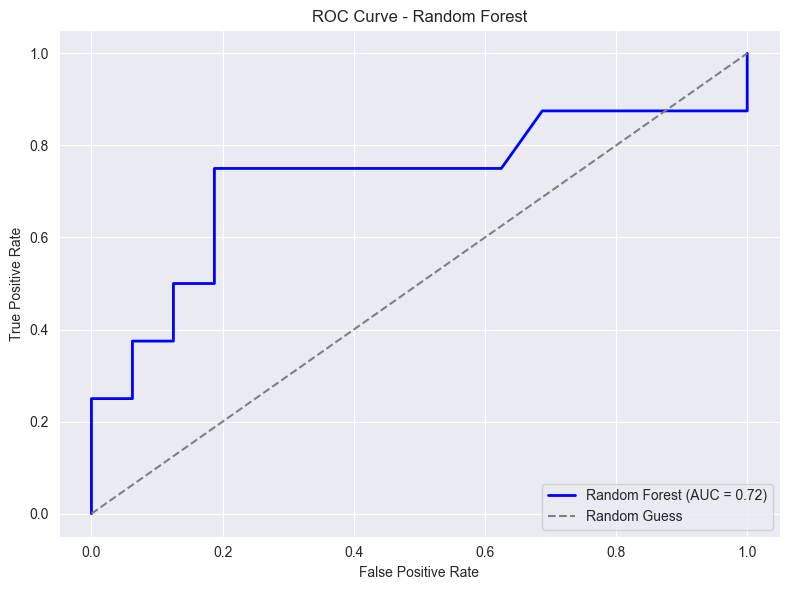

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
)

directory_path = r"W:\staff-bulk\ewi\insy\SPCDataSets\conflab-mm\v4\release\data_processed\wearables"
filename = "43.csv"
df = read_files(directory_path, filename)
timestamps = [(21074, 21197), (23048, 23179), (23312, 23394), (24729, 24816), (27087, 27197), (33977, 34152), (34243, 34376), (34656, 34683), (21394, 21509), (22895, 23010), (23873, 23995), (25003, 25128), (25661, 25743), (26082, 26174), (27846, 27970), (28803, 28930), (29396, 29562), (29803, 29949), (30825, 30911), (31251, 31329), (32316, 32387), (32843, 32906), (33342, 33450), (33858, 33974)]
X = calculate_feature_vectors(timestamps,df)
y = np.concatenate((np.ones(8), np.zeros(16)))

n_features = X.shape[1]

kf = KFold(n_splits=6, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []
all_y_prob = []

precision_list = []
recall_list = []
f1_list = []
support_list = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"\n=== Fold {fold} ===")
    print(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        class_weight="balanced",
        random_state=42,
    )
    rf.fit(X_train, y_train)

    y_scores = rf.predict_proba(X_test)[:, 1]
    y_pred_custom = (y_scores > 0.33).astype(int)
    y_proba = rf.predict_proba(X_test)[:, 1]  # probability for class 1
    
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred_custom)
    all_y_prob.extend(y_proba)
    print(y_test, y_pred_custom)
    report = classification_report(y_test, y_pred_custom, zero_division=1)
    print(report)

fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1.5, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Fetching accelerometer data from participant 20
directory_path = r"W:\staff-bulk\ewi\insy\SPCDataSets\conflab-mm\v4\internal_data\annotations\Drinking\No_Audio"
filename = "vid3_seg2_ann1.csv"
df1 = read_files(directory_path, filename)
filename = "vid3_seg2_ann3.csv"
df2 = read_files(directory_path, filename)

ground_truths = df1['20'] + df2['20']
print(ground_truths)
print(ground_truths.index[ground_truths >= 1].tolist())
# Offset vid 3 seg 2: 20284
# offsetted ranges positive samples: (26370, 26981)
# offsetted ranges negative samples: (22476, 23107), (24222, 24815)

Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg2_ann1.csv
   1  2  3  4  5  6  7  8  9  10  ...  33  34  35  36  37  40  41  42  43  44
0  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
1  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
2  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
3  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0
4  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   0   0

[5 rows x 40 columns]
Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg2_ann3.csv
   1  20  23  43
0  0   0   0   0
1  0   0   0   0
2  0   0   0   0
3  0   0   0   0
4  0   0   0   0
0       0
1       0
2       0
3       0
4       0
       ..
7195    0
7196    0
7197    0
7198    0
7199    0
Name: 20, Length: 7200, dtype: int64
[6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6

In [7]:
# Fetching accelerometer data from participant 1
directory_path = r"W:\staff-bulk\ewi\insy\SPCDataSets\conflab-mm\v4\internal_data\annotations\Drinking\No_Audio"
filename = "vid3_seg4_ann1.csv"
df1 = read_files(directory_path, filename)
filename = "vid3_seg4_ann2.csv"
df2 = read_files(directory_path, filename)
ground_truths = df1['1'] + df2['1']
print(ground_truths)
print(ground_truths.index[ground_truths >= 1].tolist())
# Offset vid 3 seg 4: 34684
# offsetted ranges positive samples: (35911, 35989), (36233, 36308), (38250, 38318)
# offsetted ranges negative samples: (34956, 35039), (35295, 35370), (36787, 36857), (37368, 37436), (39485, 39554), (40606, 40681)

Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg4_ann1.csv
   1  20  21  22  23  43
0  0   0   0   0   0   0
1  0   0   0   0   0   0
2  0   0   0   0   0   0
3  0   0   0   0   0   0
4  0   0   0   0   0   0
Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg4_ann2.csv
   1  16  20  23  43
0  0   0   0   0   0
1  0   0   0   0   0
2  0   0   0   0   0
3  0   0   0   0   0
4  0   0   0   0   0
0       0
1       0
2       0
3       0
4       0
       ..
7196    0
7197    0
7198    0
7199    0
7200    0
Name: 1, Length: 7201, dtype: int64
[1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1

In [8]:
# Fetching accelerometer data from participant 1
directory_path = r"W:\staff-bulk\ewi\insy\SPCDataSets\conflab-mm\v4\internal_data\annotations\Drinking\No_Audio"
filename = "vid3_seg6_ann1.csv"
df1 = read_files(directory_path, filename)
filename = "vid3_seg6_ann2.csv"
df2 = read_files(directory_path, filename)
ground_truths = df1['5'] + df2['5']
print(ground_truths)
print(ground_truths.index[ground_truths >= 1].tolist())
# Offset vid 3 seg 6: 49086 
# offsetted ranges positive samples: (50228, 50301), (56207, 56285)
# offsetted ranges negative samples: (49589, 49656), (52174, 52257), (53888, 53957), (55263, 55338)

Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg6_ann1.csv
   1  5  23  46
0  0  0   0   0
1  0  0   0   0
2  0  0   0   0
3  0  0   0   0
4  0  0   0   0
Successfully read the file: C:\Users\baete\Documents\No_Audio\vid3_seg6_ann2.csv
   1  5  23  25  41  46
0  0  0   0   0   0   0
1  0  0   0   0   0   0
2  0  0   0   0   0   0
3  0  0   0   0   0   0
4  0  0   0   0   0   0
0       0
1       0
2       0
3       0
4       0
       ..
7195    2
7196    2
7197    2
7198    2
7199    2
Name: 5, Length: 7200, dtype: int64
[1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 2209, 2

In [16]:
def calculate_rf_with_splits(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        class_weight="balanced",
        random_state=42,
    )
    rf.fit(X_train, y_train)
    y_scores = rf.predict_proba(X_test)[:, 1]
    y_pred_custom = (y_scores > 0.30).astype(int)
    y_proba = rf.predict_proba(X_test)[:, 1]  # probability for class 1
    print(y_test, y_pred_custom)
    report = classification_report(y_test, y_pred_custom, zero_division=1)
    print(report)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc


Successfully read the file: C:\Users\baete\Documents\wearables\43.csv
   time    accelX    accelY    accelZ      gyrX      gyrY      gyrZ  \
0  0.00 -0.228027 -0.007324  1.030762  0.312805  0.000000  0.001907   
1  0.02 -0.235948 -0.006293  1.038845 -0.202603  0.033908  0.188404   
2  0.04 -0.239855 -0.005751  1.037977 -0.155131  0.345866 -0.157462   
3  0.06 -0.235026 -0.002767  1.031576  0.007629  0.518799  0.042597   
4  0.08 -0.236960 -0.001235  1.039120  0.032762  0.450583 -0.177608   

        magX       magY       magZ      rotA      rotB      rotC      rotD  \
0  89.399994  36.599991 -47.850006  0.603419 -0.089179  0.065860  0.065860   
1  89.333327  34.899989 -46.500007  0.603421 -0.089171  0.065842  0.065842   
2  88.833323  35.833328 -47.500010  0.603418 -0.089179  0.065869  0.065869   
3  89.049993  36.099991 -46.700002  0.603412 -0.089192  0.065918  0.065918   
4  89.391163  35.699997 -46.500000  0.603412 -0.089195  0.065925  0.065925   

        rssi  
0 -66.000000  
1 -7

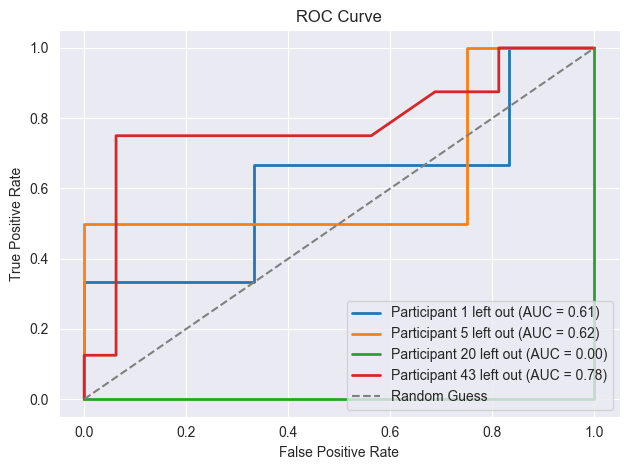

In [17]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
)

directory_path = r"W:\staff-bulk\ewi\insy\SPCDataSets\conflab-mm\v4\release\data_processed\wearables"
filename = "43.csv"
df = read_files(directory_path, filename)
timestamps43 = [(21074, 21197), (23048, 23179), (23312, 23394), (24729, 24816), (27087, 27197), (33977, 34152), (34243, 34376), (34656, 34683), (21394, 21509), (22895, 23010), (23873, 23995), (25003, 25128), (25661, 25743), (26082, 26174), (27846, 27970), (28803, 28930), (29396, 29562), (29803, 29949), (30825, 30911), (31251, 31329), (32316, 32387), (32843, 32906), (33342, 33450), (33858, 33974)]
X43 = calculate_feature_vectors(timestamps43,df)
y43 = np.concatenate((np.ones(8), np.zeros(16)))


filename = "20.csv"
df = read_files(directory_path, filename)
timestamps20 = [(26370, 26981), (22476, 23107), (24222, 24815)]
X20 = calculate_feature_vectors(timestamps20,df)
y20 = np.concatenate((np.ones(1), np.zeros(2)))

filename = "1.csv"
df = read_files(directory_path, filename)
timestamps1 = [(35911, 35989), (36233, 36308), (38250, 38318), (34956, 35039), (35295, 35370), (36787, 36857), (37368, 37436), (39485, 39554), (40606, 40681)]
X1 = calculate_feature_vectors(timestamps1,df)
y1 = np.concatenate((np.ones(3), np.zeros(6)))

filename = "5.csv"
df = read_files(directory_path, filename)
timestamps5 = [(50228, 50301), (56207, 56285), (49589, 49656), (52174, 52257), (53888, 53957), (55263, 55338)]
X5 = calculate_feature_vectors(timestamps5,df)
y5 = np.concatenate((np.ones(2), np.zeros(4)))

feature_vector_list = (X1, X5, X20, X43)
ground_truth_list = (y1, y5, y20, y43)
participant_list = [1, 5, 20, 43]

for i in range(len(feature_vector_list)):
    X_test = feature_vector_list[i]
    y_test = ground_truth_list[i]

    X_train = np.concatenate([feature_vector_list[j] for j in range(len(feature_vector_list)) if j != i], axis=0)
    y_train = np.concatenate([ground_truth_list[j] for j in range(len(ground_truth_list)) if j != i], axis=0)
    fpr, tpr, roc_auc = calculate_rf_with_splits(X_train, X_test, y_train, y_test)
    plt.plot(fpr, tpr, lw=2, label=f"Participant {participant_list[i]} left out (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Mean duration (frames): 2.2003968253968256
Median duration (frames): 1.4083333333333332
Variance of duration (frames): 5.290331817008647


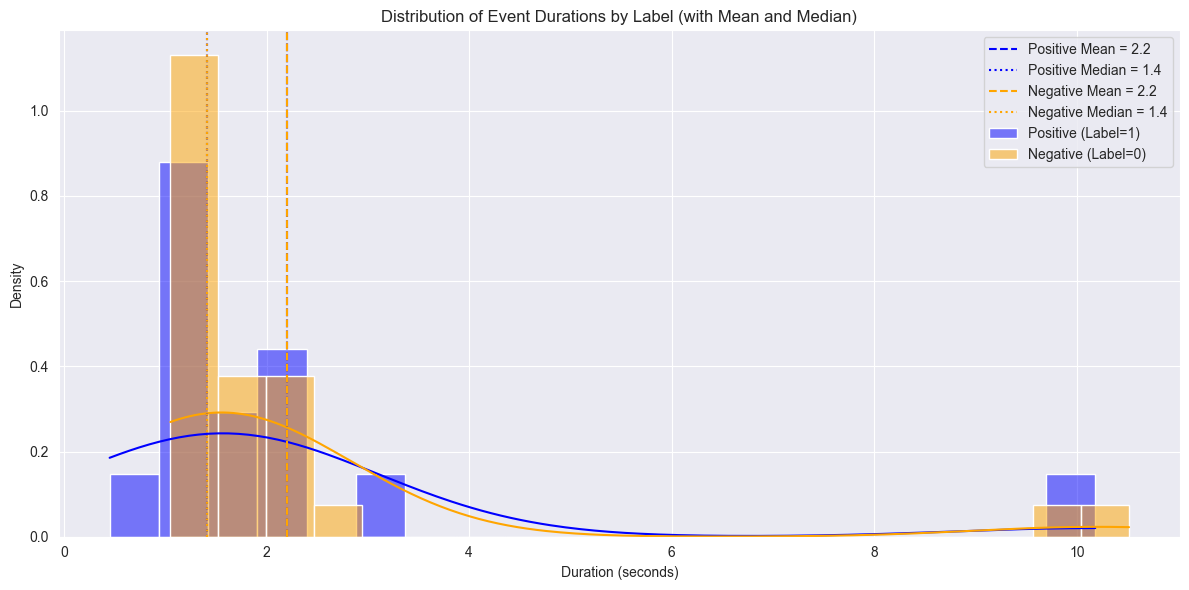

In [2]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

latex_data = """
1227,1305,vid3_seg4,350.814, 352.862,20.45,21.75,1,1
1549,1624,vid3_seg4,383.675, 385.855,25.82,27.07,1,1
3566,3634,vid3_seg4,388.069, 389.434,59.43,60.57,1,1
272,355,vid3_seg4,411.658, 413.106,4.53,5.92,0,1
611,686,vid3_seg4,450.911, 452.742,10.18,11.43,0,1
2103,2173,vid3_seg4,565.607, 568.52,35.05,36.22,0,1
2684,2752,vid3_seg4,570.035, 572.249,44.73,45.87,0,1
4801,4870,vid3_seg4,576.91, 577.36,80.02,81.17,0,1
5922,5997,vid3_seg4,356.141, 358.055,98.70,99.95,0,1
1142,1215,vid3_seg6,381.128, 383.042,19.03,20.25,1,5
7121,7199,vid3_seg6,397.408, 399.439,118.68,119.98,1,5
503,570,vid3_seg6,416.219, 418.3,8.38,9.50,0,5
3088,3171,vid3_seg6,427.173, 428.538,51.47,52.85,0,5
4802,4871,vid3_seg6,434.181, 435.713,80.03,81.18,0,5
6177,6252,vid3_seg6,463.546, 465.61,102.95,104.20,0,5
6086,6697,vid3_seg2,479.477, 481.591,101.43,111.62,1,20
2192,2823,vid3_seg2,489.348, 492.112,36.53,47.05,0,20
3938,4531,vid3_seg2,496.124, 498.554,65.63,75.52,0,20
790,913,vid3_seg2,513.137, 514.568,13.17,15.22,1,43
2764,2895,vid3_seg2,520.228, 521.527,46.07,48.25,1,43
3028,3110,vid3_seg2,537.957, 539.139,50.47,51.83,1,43
4445,4532,vid3_seg2,546.73, 547.779,74.08,75.53,1,43
6803,6913,vid3_seg2,555.037, 556.834,113.38,115.22,1,43
6493,6668,vid3_seg3,563.626, 565.557,108.22,111.13,1,43
6759,6892,vid3_seg3,438.975, 449.146,112.65,114.87,1,43
7172,7199,vid3_seg3,374.153, 384.657,119.53,119.98,1,43
1110,1225,vid3_seg2,403.218, 413.09,18.50,20.42,0,43
2611,2726,vid3_seg2,597.802, 599.101,43.52,45.43,0,43
3589,3711,vid3_seg2,603.162, 604.411,59.82,61.85,0,43
4719,4844,vid3_seg2,636.739, 637.871,78.65,80.73,0,43
5377,5459,vid3_seg2,581.904, 583.286,89.62,90.98,0,43
5798,5890,vid3_seg2,587.548, 588.796,96.63,98.17,0,43
362,486,vid3_seg2,612.385, 613.55,6.03,8.10,0,43
1319,1446,vid3_seg2,622.056, 623.188,21.98,24.10,0,43
1912,2078,vid3_seg2,657.298, 658.446,31.87,34.63,0,43
2319,2465,vid3_seg2,675.959, 677.207,38.65,41.08,0,43
3341,3427,vid3_seg3,836.134, 837.349,55.68,57.12,0,43
3767,3845,vid3_seg3,935.665, 936.963,62.78,64.08,0,43
4832,4903,vid3_seg3,825.497, 826.612,80.53,81.72,0,43
5359,5422,vid3_seg3,868.528, 869.91,89.32,90.37,0,43
5858,5966,vid3_seg3,897.061, 898.21,97.63,99.43,0,43
6374,6490,vid3_seg3,919.95, 921.199,106.23,108.17,0,43
"""

df = pd.read_csv(StringIO(latex_data), header=None)
df.columns = ["Sampleframes start", "Sampleframes finish", "Video", "Sampletime acc s", "Sampletime acc f", "Sampletime video s", "Sampletime video f", "Label", "Participant"]

df['duration_frames'] = (df['Sampleframes finish'] - df['Sampleframes start'])/60

mean_duration = df['duration_frames'].mean()
median_duration = df['duration_frames'].median()
variance_duration = df['duration_frames'].var()

print("Mean duration (frames):", mean_duration)
print("Median duration (frames):", median_duration)
print("Variance of duration (frames):", variance_duration)

positive_durations = df[df['Label'] == 1]['duration_frames']
negative_durations = df[df['Label'] == 0]['duration_frames']

positive = df[df['Label'] == 1]['duration_frames']
negative = df[df['Label'] == 0]['duration_frames']

pos_mean = positive.mean()
pos_median = positive.median()
neg_mean = negative.mean()
neg_median = negative.median()

plt.figure(figsize=(12, 6))
sns.histplot(positive, color='blue', label='Positive (Label=1)', kde=True, bins=20, stat='density', alpha=0.5)
sns.histplot(negative, color='orange', label='Negative (Label=0)', kde=True, bins=20, stat='density', alpha=0.5)

plt.axvline(pos_mean, color='blue', linestyle='--', linewidth=1.5, label=f'Positive Mean = {pos_mean:.1f}')
plt.axvline(pos_median, color='blue', linestyle=':', linewidth=1.5, label=f'Positive Median = {pos_median:.1f}')

plt.axvline(neg_mean, color='orange', linestyle='--', linewidth=1.5, label=f'Negative Mean = {neg_mean:.1f}')
plt.axvline(neg_median, color='orange', linestyle=':', linewidth=1.5, label=f'Negative Median = {neg_median:.1f}')

plt.title('Distribution of Event Durations by Label (with Mean and Median)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

